# Visualising the Bughunt Corpus
This notebook follows the process of taking the frequency distribution of the different bug words and creating a visualisation of how frequency changes over time.

NB: This notebook does not actually create any of the figures in the folder `../output/figs/bughunt` such as `insect-stem-freq-unigram.png` -- that is done by the script `insect-freq-unigram.py`. The examples here are a walk-through and explanation of the code.

We will use the code library called Natural Language Toolkit (NLTK) to provide a lot of text mining functions that are already written. More information on this can be found here: http://www.nltk.org/. We will also use two popular libraries: Pandas for data manipulation (https://pandas.pydata.org/) and matplotlib (https://matplotlib.org/) to create the graph.

## Preparing the Data
### Loading the CSV File

After text processing the corpus, the results were saved as a CSV file. First we have to load the data from this file into what is called a 'dataframe', which is much like a table.

In [1]:
from pathlib import Path
data_path = Path('..', 'output', 'csv', 'bughunt', 'insect-stem-freq-unigram.csv')

import pandas as pd
df = pd.read_csv(data_path, index_col='year')
df

,ant,bee,beetl,butterfli,cockroach,cricket,dragonfli,earwig,flea,fli,gnat,grasshopp,ladybird,lous,mosquito,moth,spider,termit,wasp
year,,,,,,,,,,,,,,,,,,,
1800,0.000000,0.001931,0.001931,0.005792,0.000000,0.000000,0.000965,0.000000,0.000000,0.000965,0.001931,0.004826,0.000000,0.000000,0.000000,0.001931,0.001931,0.000000,0.000965
1810,0.000226,0.006998,0.000090,0.009120,0.000000,0.000226,0.000000,0.000000,0.000135,0.002754,0.000045,0.000045,0.000000,0.000135,0.000000,0.000271,0.000090,0.000000,0.000226
1820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1830,0.002341,0.003771,0.000828,0.001310,0.000008,0.000083,0.000120,0.000083,0.000166,0.003771,0.000557,0.000090,0.000105,0.000083,0.000008,0.002507,0.002258,0.000120,0.001377
1840,0.001523,0.002746,0.000924,0.001767,0.000036,0.000816,0.000181,0.000145,0.000145,0.002311,0.000589,0.000190,0.000100,0.000036,0.000091,0.001169,0.001504,0.000127,0.000825
1850,0.001554,0.002751,0.000474,0.000856,0.000033,0.000133,0.000208,0.000058,0.000108,0.002552,0.000199,0.000125,0.000058,0.000000,0.000017,0.000765,0.000981,0.000017,0.000499
1860,0.000695,0.000207,0.000000,0.000789,0.000000,0.000019,0.000000,0.000000,0.000000,0.000582,0.000000,0.000019,0.000000,0.000000,0.000000,0.000000,0.000732,0.000038,0.000075
1870,0.003961,0.002831,0.000683,0.002134,0.000028,0.000042,0.000070,0.000223,0.000098,0.002524,0.000098,0.000153,0.000153,0.000014,0.000000,0.001116,0.001311,0.000223,0.000474
1880,0.001335,0.000941,0.001062,0.000471,0.000070,0.000073,0.000051,0.000013,0.000041,0.001370,0.000089,0.000184,0.000022,0.000076,0.000137,0.000785,0.000416,0.000089,0.000375


### Loading the Bug Word list
We also need the bug word list again from the text file.

In [2]:
from pathlib import Path
stemlist = Path('..', 'wordlists', 'insect-wordstems.txt')

from nltk.corpus.reader import WordListCorpusReader
insect_words = WordListCorpusReader('.', [stemlist])
insect_words.words()

['ant',
 'bee',
 'beetl',
 'butterfli',
 'cockroach',
 'cricket',
 'dragonfli',
 'earwig',
 'flea',
 'fli',
 'gnat',
 'grasshopp',
 'ladybird',
 'lous',
 'mosquito',
 'moth',
 'spider',
 'termit',
 'wasp']

## Plotting
Now that we have the data ready, we can experiment with some plotting!

Text(0.5, 0.98, "Frequency of Bugs in Children's Literature by Decade 1800-1920")

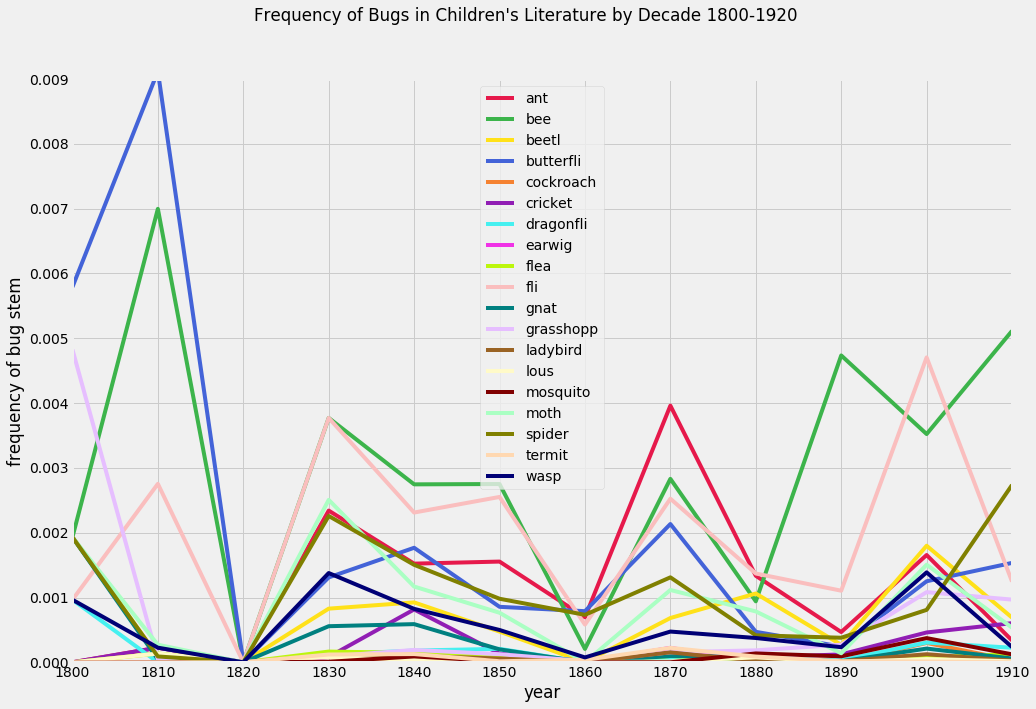

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

plt.rcParams['figure.figsize'] = [15, 10]
plt.style.use('fivethirtyeight')
cc = (cycler(color=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
                    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
                    '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
                    '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',]) *
      cycler(linestyle=['-']))
plt.rc('axes', prop_cycle=cc)

ax = plt.gca()
for insect in insect_words.words():
    df.plot(kind='line', y=insect, ax=ax)

plt.axis([1800, 1910, 0, 0.009])
plt.xticks(np.arange(1800, 1920, 10))
plt.ylabel('frequency of bug stem')
plt.suptitle('Frequency of Bugs in Children\'s Literature by Decade 1800-1920')